## Blood Pressure Analysis

### Read Data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('root')

import datetime as dt
date = dt.datetime.now().date()

%load_ext watermark
%watermark -iv

matplotlib 3.0.3
pandas     0.24.2
numpy      1.16.2



In [2]:
df = (pd.read_excel('data/2019-08-15-Blood Pressure.xls',
                  usecols=['Date','Time','Sys','Di','Pulse','Activity','Food','Water','Alcohol','Rest','Health'])
     ).dropna(axis=0, how='any',subset=['Time']).fillna('')

# coerce datetime
df['Date'] = df['Date'].astype(str).str[:10]
df['Time'] = df['Time'].astype(str).str.split('.')
df['Hr'] = ''
df['Hr/10'] = ''
for row in range(df.shape[0]):
    df.loc[df.index[row],'Hr'] = int(df.loc[df.index[row],'Time'][0])
    df.loc[df.index[row],'Hr/10'] = int(df.loc[df.index[row],'Time'][1])
df['Min'] = np.where(df['Hr/10']>10, df['Hr/10']*10/100,df['Hr/10']*60/10)
df['Time'] = df['Hr'].astype(str)+':'+df['Min'].astype(str)
df['DateTime'] = pd.to_datetime(df['Date']+' '+df['Time'])

# plotting df
dfPlot = df[['DateTime','Sys','Di','Pulse','Activity','Food','Water','Alcohol','Rest','Health']].set_index('DateTime')
dfPlot.tail()

,Sys,Di,Pulse,Activity,Food,Water,Alcohol,Rest,Health
DateTime,,,,,,,,,
2019-08-12 06:30:00,135.0,76.0,57.0,,,,,,
2019-08-12 22:00:00,127.0,63.0,60.0,,,,,,
2019-08-13 07:30:00,149.0,91.0,93.0,,,,,,
2019-08-15 07:00:00,147.0,76.0,54.0,,,,,,
2019-08-15 08:02:30,128.0,57.0,57.0,,,,,,


### Plot Data

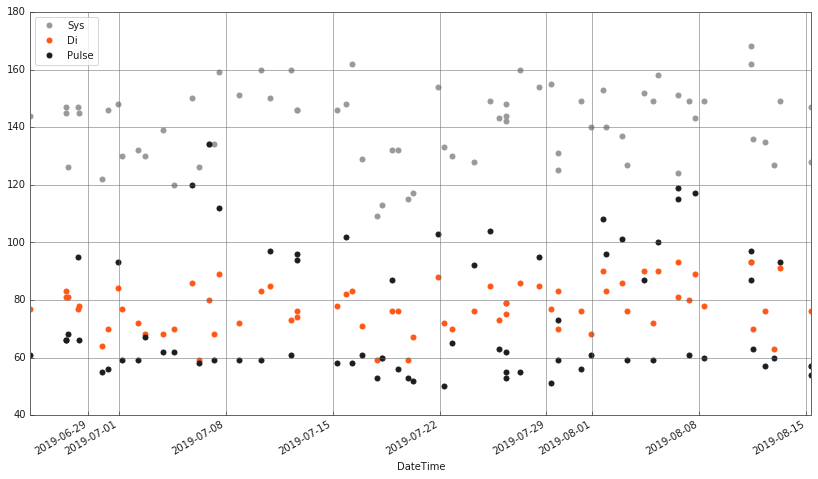

In [3]:
dfPlot.plot(style='.', markersize=10)
plt.gcf().set_size_inches(14,8)

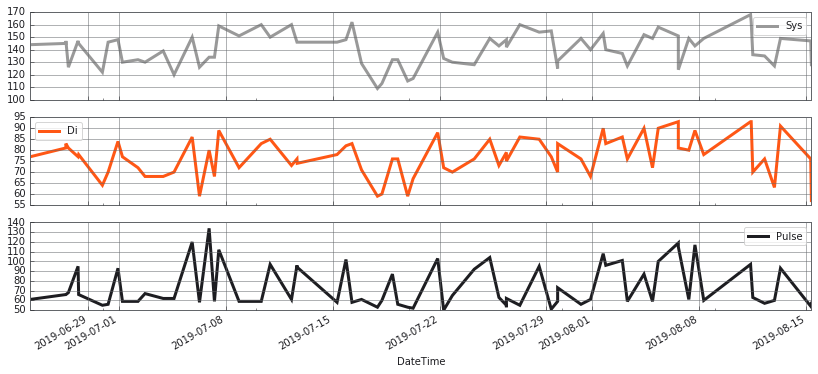

In [4]:
dfPlot.plot(subplots=True, layout=(4,1))
plt.gcf().set_size_inches(14,8)

## Forecast

In [5]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [6]:
# def prophet_forecast(df, x, y, periods):
def prophet_forecast(df: pd.DataFrame,
                     x: str,
                     y: str,
                     periods: int
                    ):
    """
    This function generates a forecast using the Prophet library.
    :param df: a pandas dataframe of the time series data
    :param x: a string of the column name of the x (time) values
    :param y: a string of the column name of the y (forecasted) values
    :param periods: an int of the number of periods to forecast
    :return: display plots of the forecast
    """
    
    # shape data
    dfP = df[[x,y]]
    dfP.columns = ['ds', 'y']
    # print(dfP.tail(1))
    
    # create model
    m1 = Prophet()
    m1.fit(dfP)
    
    # forecast
    future1 = m1.make_future_dataframe(periods=periods)
    forecast1 = m1.predict(future1)
    # print(forecast1.tail(1))
    
    m1.plot_components(forecast1)
    
    m1.plot(forecast1)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.title('Forecast: {}'.format(y))
    plt.xlabel('')
    plt.ylabel(y)
    plt.gca().yaxis.tick_right()

### Forecast: Sys

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/matthewkudija/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


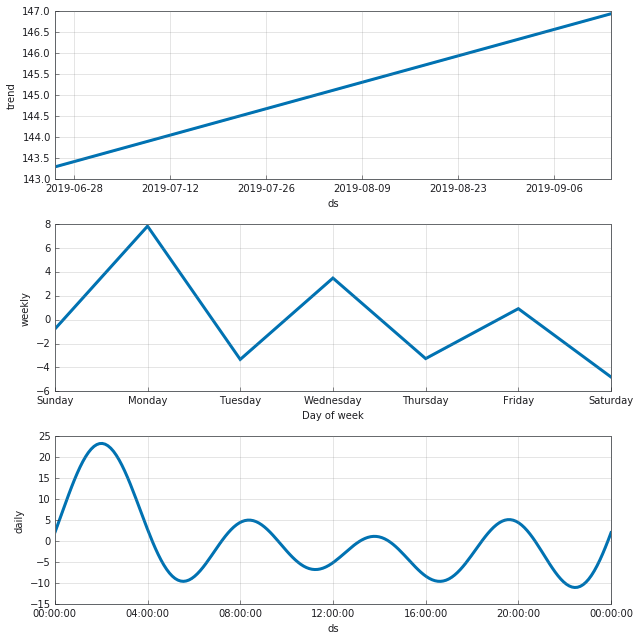

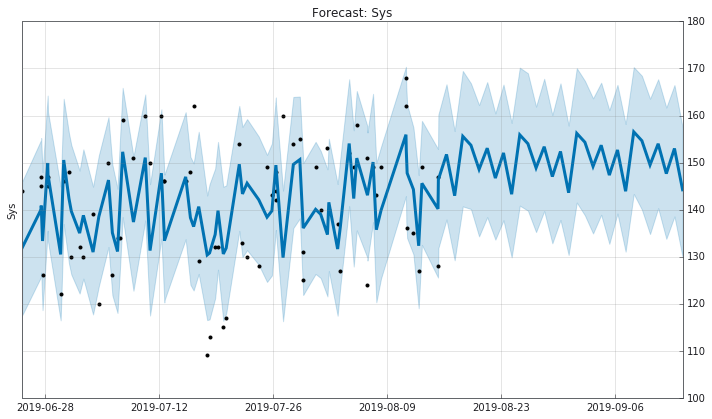

In [7]:
prophet_forecast(df, x='DateTime', y='Sys', periods=30)

### Forecast: Di

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/matthewkudija/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


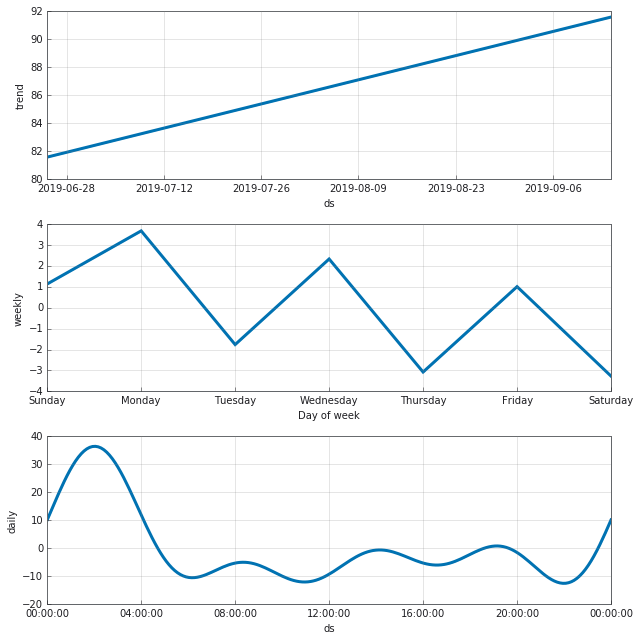

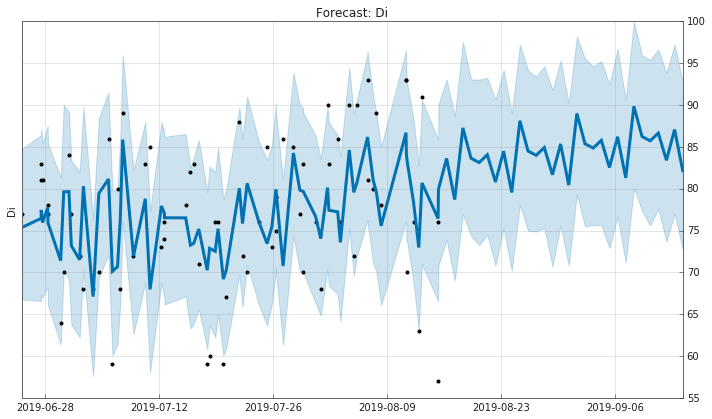

In [8]:
prophet_forecast(df, x='DateTime', y='Di', periods=30)

### Forecast: Pulse

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/matthewkudija/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


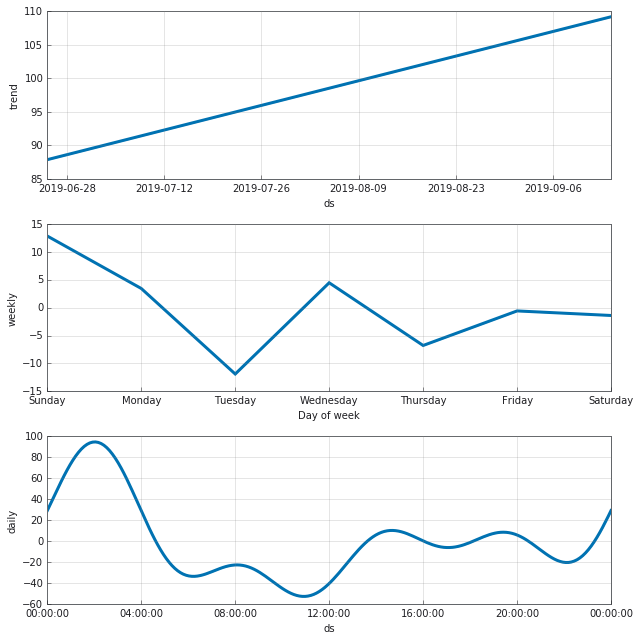

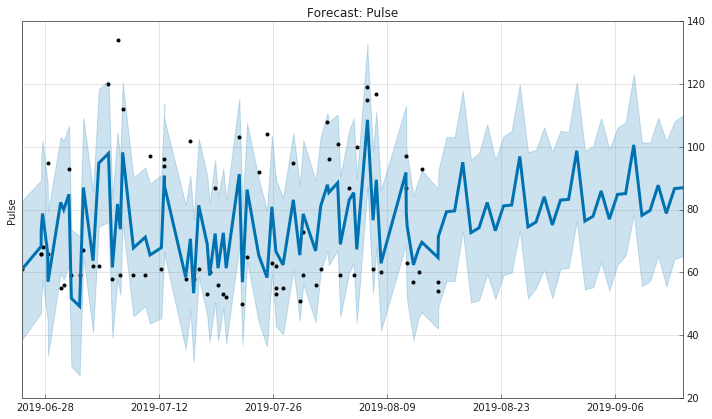

In [9]:
prophet_forecast(df, x='DateTime', y='Pulse', periods=30)